In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('Downloads/train.csv')


In [3]:
dataset.shape

(1460, 81)

In [5]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


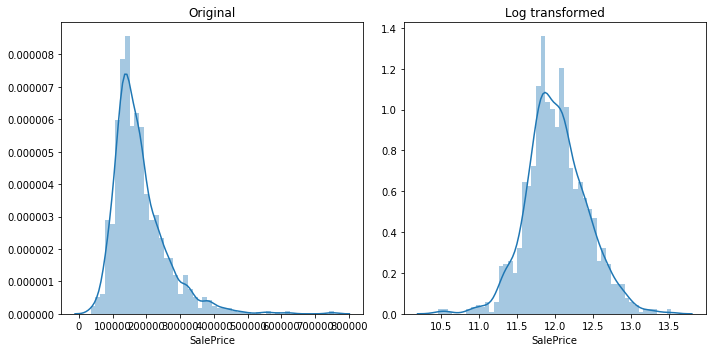

In [6]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(dataset.SalePrice, bins=50)
plt.title('Original')

plt.subplot(1,2,2)
sns.distplot(np.log1p(dataset.SalePrice), bins=50)
plt.title('Log transformed')

plt.tight_layout()

In [7]:
dataset.SalePrice.skew()


1.8828757597682129

In [8]:
dataset.SalePrice.kurt()

6.536281860064529

In [9]:
var = 'GrLivArea'
data = pd.concat([dataset["SalePrice"], dataset[var]], axis=1)
data.head()

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


In [10]:
pd.concat

<function pandas.core.reshape.concat.concat(objs: Union[Iterable[Union[ForwardRef('DataFrame'), ForwardRef('Series')]], Mapping[Union[Hashable, NoneType], Union[ForwardRef('DataFrame'), ForwardRef('Series')]]], axis=0, join='outer', ignore_index: bool = False, keys=None, levels=None, names=None, verify_integrity: bool = False, sort: bool = False, copy: bool = True) -> Union[ForwardRef('DataFrame'), ForwardRef('Series')]>

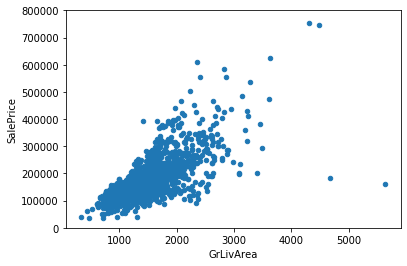

In [12]:
var = 'GrLivArea'
data = pd.concat([dataset["SalePrice"], dataset[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0,800000))

In [13]:
corr_matrix = dataset.corr()


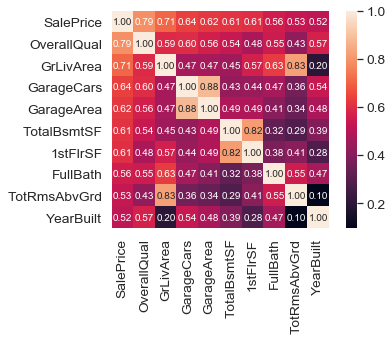

In [22]:
k = 10 
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataset[cols].values.T)

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [23]:
total = dataset.isnull().sum().sort_values(ascending = False)
percent = (dataset.isnull().sum() / dataset.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [27]:
dataset = pd.get_dummies(dataset)


In [28]:
dataset['SalePrice']


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64